<a href="https://colab.research.google.com/github/lukasz18golec/LSTM-time-series-forecasting-EUR-USD/blob/main/LSTM_time_series_forecasting_EUR_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EUR/USD Exchange Currency Pair - Time Series Forecasting**

This machine learning project covers on time series forecasting, specifically predicting the daily "Close" prices of the EUR/USD currency pair. The dataset spans a comprehensive period of 10 years, from December 18, 2013, to December 18, 2023. The primary objective is to leverage Long Short-Term Memory (LSTM) neural networks, a powerful type of recurrent neural network (RNN), for predicting the currency pair's closing prices over the next 5 days. The LSTM model is chosen for its ability to capture long-term dependencies in sequential data, making it well-suited for forecasting tasks in financial time series analysis. The project encompasses data preprocessing, model training, and evaluation, culminating in a predictive model capable of providing valuable insights into potential future price movements.

1. Importing and loading data

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/projects/EURUSD_18_12_2023.csv'
data0 = pd.read_csv(file_path)
data0.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Open,High,Low,Close
0,2013-12-18,1.377107,1.378099,1.373479,1.377126
1,2013-12-19,1.368307,1.369394,1.365113,1.368495
2,2013-12-20,1.365598,1.370870,1.362583,1.365579
3,2013-12-23,1.367877,1.371599,1.367430,1.367839
4,2013-12-24,1.369825,1.369863,1.365579,1.369994


In [ ]:
data1 = data0[['Date', 'Close']]
data1.head()

,Date,Close
0,2013-12-18,1.377126
1,2013-12-19,1.368495
2,2013-12-20,1.365579
3,2013-12-23,1.367839
4,2013-12-24,1.369994


2. Splitting data for training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split

data1.set_index('Date', inplace=True)
data1.sort_index(inplace=True)

data1_train, data1_test = train_test_split(data1, test_size=0.2, shuffle=False)

data1_train.reset_index(inplace=True)
data1_test.reset_index(inplace=True)

In [ ]:
print("Data1_train:")
print(data1_train.head())
print("\nData1_test:")
print(data1_test.head())

Data1_train:
         Date     Close
0  2013-12-18  1.377126
1  2013-12-19  1.368495
2  2013-12-20  1.365579
3  2013-12-23  1.367839
4  2013-12-24  1.369994

Data1_test:
         Date     Close
0  2021-12-17  1.133414
1  2021-12-20  1.124354
2  2021-12-21  1.127752
3  2021-12-22  1.128757
4  2021-12-23  1.132888


3. Adding a normalized data variable

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data2_train = data1_train.copy()
data2_test = data1_test.copy()

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data1_train[['Close']])

data2_train['Close_N'] = scaler.transform(data1_train[['Close']])
data2_test['Close_N'] = scaler.transform(data1_test[['Close']])

data2_train.reset_index(inplace=True)
data2_test.reset_index(inplace=True)

In [ ]:
print("data2_train:")
print(data2_train.head())
print(data2_train.columns)
print("\ndata2_test:")
print(data2_test.head())
print(data2_test.columns)

data2_train:
   index        Date     Close   Close_N
0      0  2013-12-18  1.377126  0.954915
1      1  2013-12-19  1.368495  0.930536
2      2  2013-12-20  1.365579  0.922300
3      3  2013-12-23  1.367839  0.928683
4      4  2013-12-24  1.369994  0.934770
Index(['index', 'Date', 'Close', 'Close_N'], dtype='object')

data2_test:
   index        Date     Close   Close_N
0      0  2021-12-17  1.133414  0.266543
1      1  2021-12-20  1.124354  0.240952
2      2  2021-12-21  1.127752  0.250550
3      3  2021-12-22  1.128757  0.253389
4      4  2021-12-23  1.132888  0.265057
Index(['index', 'Date', 'Close', 'Close_N'], dtype='object')


In [ ]:
import pandas as pd

data2_train['Close_N'] = data2_train['Close_N'].fillna((data2_train['Close_N'].shift() + data2_train['Close_N'].shift(-1)) / 2)
data3_train = data2_train.copy()
print(data3_train.head())

   index        Date     Close   Close_N
0      0  2013-12-18  1.377126  0.954915
1      1  2013-12-19  1.368495  0.930536
2      2  2013-12-20  1.365579  0.922300
3      3  2013-12-23  1.367839  0.928683
4      4  2013-12-24  1.369994  0.934770


4. Training the data with LSTM model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

time_steps = 5

def create_time_series_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:(i + time_steps)].values)
        y.append(data.iloc[i + time_steps].values)
    return np.array(X), np.array(y)

X_train, y_train = create_time_series_dataset(data3_train[['Close_N']], time_steps)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
66/66 [==============================] - 6s 8ms/step - loss: 0.0265
Epoch 2/100
66/66 [==============================] - 1s 8ms/step - loss: 8.6148e-04
Epoch 3/100
66/66 [==============================] - 1s 8ms/step - loss: 7.3775e-04
Epoch 4/100
66/66 [==============================] - 1s 8ms/step - loss: 7.0043e-04
Epoch 5/100
66/66 [==============================] - 1s 8ms/step - loss: 6.8060e-04
Epoch 6/100
66/66 [==============================] - 1s 8ms/step - loss: 6.8955e-04
Epoch 7/100
66/66 [==============================] - 1s 8ms/step - loss: 6.6278e-04
Epoch 8/100
66/66 [==============================] - 1s 8ms/step - loss: 6.5756e-04
Epoch 9/100
66/66 [==============================] - 1s 8ms/step - loss: 6.7023e-04
Epoch 10/100
66/66 [==============================] - 1s 8ms/step - loss: 6.8670e-04
Epoch 11/100
66/66 [==============================] - 1s 8ms/step - loss: 8.0297e-04
Epoch 12/100
66/66 [==============================] - 1s 8ms/step - loss: 6.68

In [ ]:
X_test, y_test = create_time_series_dataset(data2_test[['Close_N']], time_steps)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

5. Creating predictive values in test dataset

In [ ]:
predictions_df = pd.DataFrame({
    'Date': data2_test['Date'].iloc[:len(model.predict(X_test))],
    'Close': data2_test['Close'].iloc[:len(model.predict(X_test))],
    'Close_N': data2_test['Close_N'].iloc[:len(model.predict(X_test))],
    'Close_P': model.predict(X_test).flatten()
})

print(predictions_df)

17/17 [==============================] - 0s 4ms/step
           Date     Close   Close_N   Close_P
0    2021-12-17  1.133414  0.266543  0.261314
1    2021-12-20  1.124354  0.240952  0.261363
2    2021-12-21  1.127752  0.250550  0.260358
3    2021-12-22  1.128757  0.253389  0.261751
4    2021-12-23  1.132888  0.265057  0.257888
..          ...       ...       ...       ...
512  2023-12-05  1.083776  0.126338  0.108895
513  2023-12-06  1.079366  0.113882  0.108293
514  2023-12-07  1.076670  0.106267  0.116555
515  2023-12-08  1.079214  0.113453  0.139910
516  2023-12-11  1.076577  0.106005  0.169664

[517 rows x 4 columns]


In [ ]:
predictions_df['Close_P'] = predictions_df['Close_P'].shift(5)

6. Reversing the predictive values to the original scale

In [ ]:
predictions_df['Close_P_original_scale'] = scaler.inverse_transform(predictions_df['Close_P'].values.reshape(-1, 1))
predictions_df.sort_values(by='Date', inplace=True)

print(predictions_df[['Date', 'Close', 'Close_N', 'Close_P', 'Close_P_original_scale']])

           Date     Close   Close_N   Close_P  Close_P_original_scale
0    2021-12-17  1.133414  0.266543       NaN                     NaN
1    2021-12-20  1.124354  0.240952       NaN                     NaN
2    2021-12-21  1.127752  0.250550       NaN                     NaN
3    2021-12-22  1.128757  0.253389       NaN                     NaN
4    2021-12-23  1.132888  0.265057       NaN                     NaN
..          ...       ...       ...       ...                     ...
512  2023-12-05  1.083776  0.126338  0.140450                1.088772
513  2023-12-06  1.079366  0.113882  0.128101                1.084400
514  2023-12-07  1.076670  0.106267  0.115835                1.080057
515  2023-12-08  1.079214  0.113453  0.108095                1.077317
516  2023-12-11  1.076577  0.106005  0.114348                1.079531

[517 rows x 5 columns]


In [ ]:
final_data = predictions_df.copy()

7. Comparing the realistic data with predicted values using visualization

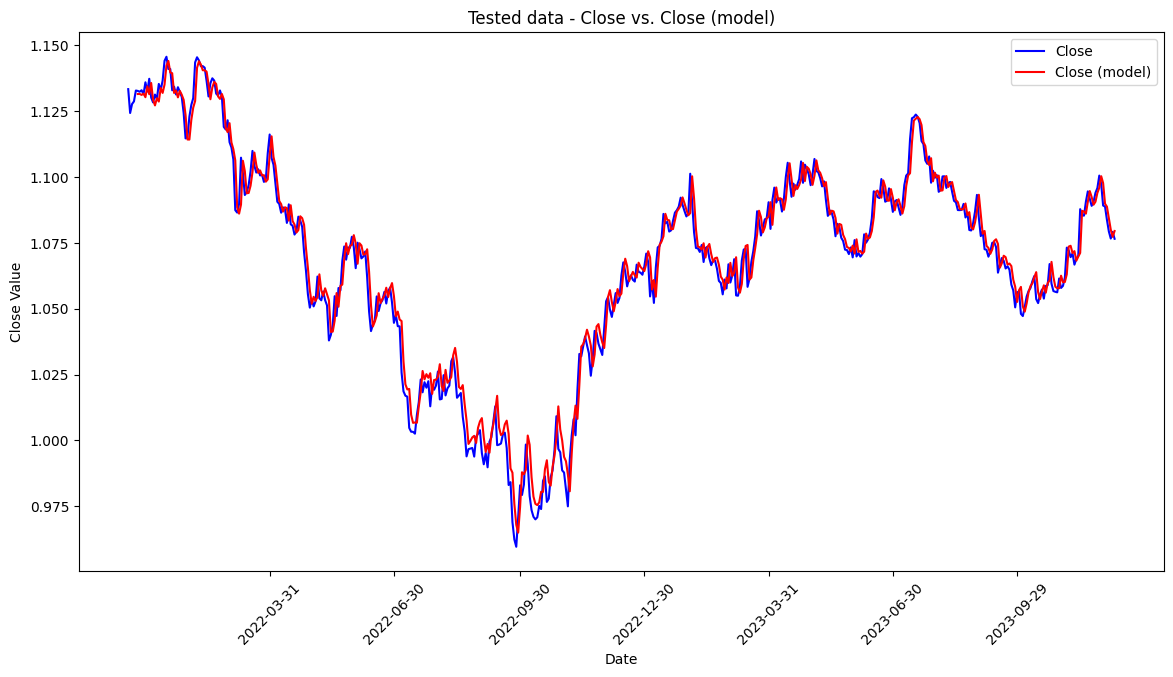

In [ ]:
import matplotlib.pyplot as plt

predictions_df.set_index('Date', inplace=True)

selected_dates = ['2022-03-31', '2022-06-30', '2022-09-30', '2022-12-30', '2023-03-31', '2023-06-30', '2023-09-29']

plt.figure(figsize=(14, 7))
plt.plot(predictions_df['Close'], label='Close', color='blue')
plt.plot(predictions_df['Close_P_original_scale'], label='Close (model)', color='red')

plt.xticks(selected_dates, rotation=45)

plt.legend()
plt.title('Tested data - Close vs. Close (model)')
plt.xlabel('Date')
plt.ylabel('Close Value')

plt.show()

8. Cleaning dataset

In [ ]:
final_data = final_data.iloc[5:].reset_index(drop=True)
final_data.drop(['Close_N', 'Close_P'], axis=1, inplace=True)

print(final_data.head())

         Date     Close  Close_P_original_scale
0  2021-12-24  1.132734                1.131563
1  2021-12-27  1.132426                1.131580
2  2021-12-28  1.133003                1.131224
3  2021-12-29  1.131478                1.131717
4  2021-12-30  1.136015                1.130350


In [ ]:
print(final_data[['Date', 'Close', 'Close_P_original_scale']])

           Date     Close  Close_P_original_scale
0    2021-12-24  1.132734                1.131563
1    2021-12-27  1.132426                1.131580
2    2021-12-28  1.133003                1.131224
3    2021-12-29  1.131478                1.131717
4    2021-12-30  1.136015                1.130350
..          ...       ...                     ...
507  2023-12-05  1.083776                1.088772
508  2023-12-06  1.079366                1.084400
509  2023-12-07  1.076670                1.080057
510  2023-12-08  1.079214                1.077317
511  2023-12-11  1.076577                1.079531

[512 rows x 3 columns]


9. Testing the effectiveness of the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import numpy as np

valid_data = final_data.dropna(subset=['Close', 'Close_P_original_scale'])
actual_values = valid_data['Close']
predicted_values = valid_data['Close_P_original_scale']

rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")

mae = mean_absolute_error(actual_values, predicted_values)
print(f"MAE: {mae}")

mape = mean_absolute_percentage_error(actual_values, predicted_values)
print(f"MAPE: {mape}")

smape = 2 * np.mean(np.abs(predicted_values - actual_values) / (np.abs(predicted_values) + np.abs(actual_values)))
print(f"SMAPE: {smape}")

r2 = r2_score(actual_values, predicted_values)
print(f"R-squared: {r2}")

RMSE: 0.006083103737104555
MAE: 0.004639093257011254
MAPE: 0.004394268219791667
SMAPE: 0.004386971632029071
R-squared: 0.9771207412721555


10. Preparing dataset for forecasting

In [ ]:
import pandas as pd

new_records = [
    [512, '2023-12-12', 1.076658, 1.076658],
    [513, '2023-12-13', 1.079867, 1.079867],
    [514, '2023-12-14', 1.088613, 1.088613],
    [515, '2023-12-15', 1.099360, 1.099360],
    [516, '2023-12-18', 1.092299, 1.092299]
]

new_records_df = pd.DataFrame(new_records, columns=['index', 'Date', 'Close', 'Close_P_original_scale'])
final_data = final_data.append(new_records_df, ignore_index=True)

<ipython-input-38-03641189a325>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(new_records_df, ignore_index=True)


In [ ]:
final_data = final_data.drop(columns=['index'], errors='ignore')
final_data['time'] = np.arange(1, len(final_data) + 1)

print(final_data)

           Date     Close  Close_P_original_scale  time
0    2021-12-24  1.132734                1.131563     1
1    2021-12-27  1.132426                1.131580     2
2    2021-12-28  1.133003                1.131224     3
3    2021-12-29  1.131478                1.131717     4
4    2021-12-30  1.136015                1.130350     5
..          ...       ...                     ...   ...
512  2023-12-12  1.076658                1.076658   513
513  2023-12-13  1.079867                1.079867   514
514  2023-12-14  1.088613                1.088613   515
515  2023-12-15  1.099360                1.099360   516
516  2023-12-18  1.092299                1.092299   517

[517 rows x 4 columns]


11. Time series forecasting based on last 60 days

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

last_60_records = final_data.iloc[-60:]

X2_train = last_60_records[['time']]
y2_train = last_60_records['Close_P_original_scale']
model = LinearRegression()
model.fit(X2_train, y2_train)

new_data = pd.DataFrame({'time': [518, 519, 520, 521, 522]})

predicted_x = model.predict(new_data)

new_records = pd.DataFrame({'time': [518, 519, 520, 521, 522], 'Close_P_original_scale': predicted_x})

final_data = pd.concat([final_data, new_records], ignore_index=True)

print(final_data)

           Date     Close  Close_P_original_scale  time
0    2021-12-24  1.132734                1.131563     1
1    2021-12-27  1.132426                1.131580     2
2    2021-12-28  1.133003                1.131224     3
3    2021-12-29  1.131478                1.131717     4
4    2021-12-30  1.136015                1.130350     5
..          ...       ...                     ...   ...
517         NaN       NaN                1.094157   518
518         NaN       NaN                1.094894   519
519         NaN       NaN                1.095631   520
520         NaN       NaN                1.096368   521
521         NaN       NaN                1.097105   522

[522 rows x 4 columns]


In [ ]:
final_data.loc[517:521, 'Date'] = ['2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-25']

print(final_data)


           Date     Close  Close_P_original_scale  time
0    2021-12-24  1.132734                1.131563     1
1    2021-12-27  1.132426                1.131580     2
2    2021-12-28  1.133003                1.131224     3
3    2021-12-29  1.131478                1.131717     4
4    2021-12-30  1.136015                1.130350     5
..          ...       ...                     ...   ...
517  2023-12-19       NaN                1.094157   518
518  2023-12-20       NaN                1.094894   519
519  2023-12-21       NaN                1.095631   520
520  2023-12-22       NaN                1.096368   521
521  2023-12-25       NaN                1.097105   522

[522 rows x 4 columns]


12. Visualization the final dataset

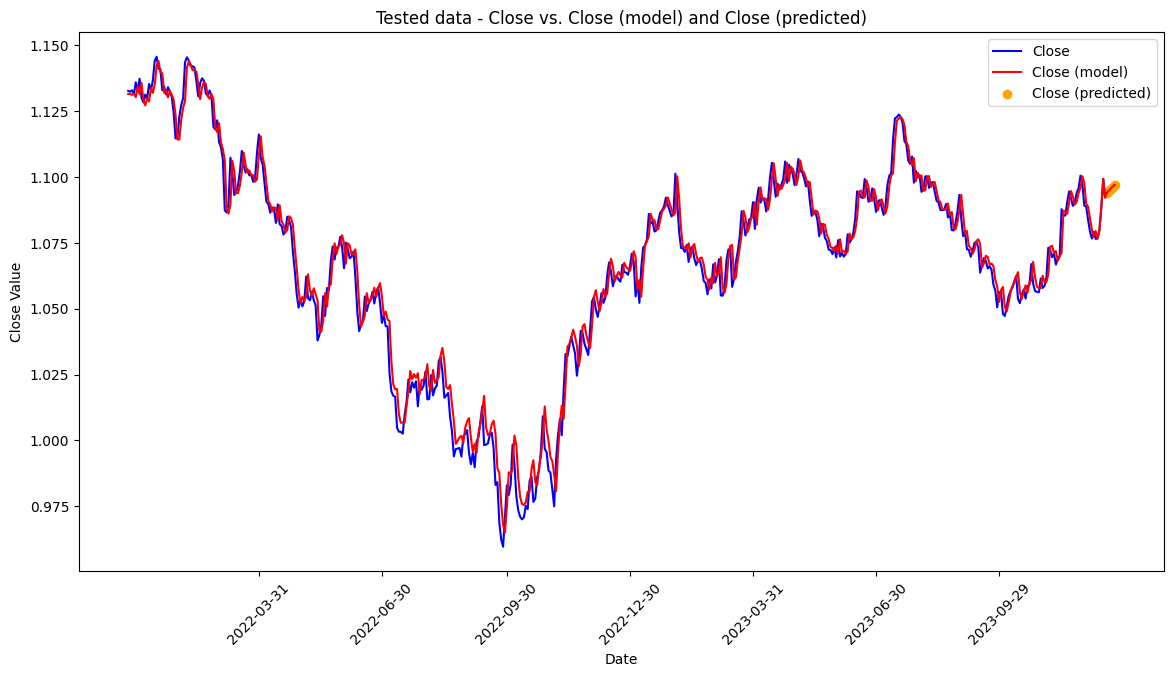

In [ ]:
import matplotlib.pyplot as plt

final_data.set_index('Date', inplace=True)

selected_dates = ['2022-03-31', '2022-06-30', '2022-09-30', '2022-12-30', '2023-03-31', '2023-06-30', '2023-09-29']

plt.figure(figsize=(14, 7))
plt.plot(final_data['Close'], label='Close', color='blue')
plt.plot(final_data['Close_P_original_scale'], label='Close (model)', color='red')
plt.scatter(final_data.index[-5:], final_data['Close_P_original_scale'].iloc[-5:], color='orange', label='Close (predicted)')
plt.xticks(selected_dates, rotation=45)

plt.legend()
plt.title('Tested data - Close vs. Close (model) and Close (predicted)')
plt.xlabel('Date')
plt.ylabel('Close Value')

plt.show()


13. Conclusion

In utilizing the LSTM model for time series forecasting on the daily closing prices of the EUR/USD currency pair, with a focus on predicting the upcoming 5 days, the model was trained on 80% of the training data, and the forecasting itself was limited to the last 60 days of the test dataset. The forecasting results for the period from December 19 to December 25, 2023, are as follows:

December 19, 2023: 1.094157                                                     
December 20, 2023: 1.094894                                                     
December 21, 2023: 1.095631                                                     
December 22, 2023: 1.096368                                                     
December 25, 2023: 1.097105                                                     

Moreover, The model demonstrates a remarkable level of efficiency, as evidenced by the following metrics:

oot Mean Squared Error (RMSE): 0.006083103737104555                             
Mean Absolute Error (MAE): 0.004639093257011254                                 
Mean Absolute Percentage Error (MAPE): 0.004394268219791667                     
Symmetric Mean Absolute Percentage Error (SMAPE): 0.004386971632029071          
R-squared (R²): 0.9771207412721555                                              

These predictions suggest a subtle upward trajectory in the EUR/USD closing prices over the specified timeframe. It is noteworthy that the LSTM model, trained on historical data, provides a valuable tool for forecasting future trends. Moreover, it's adaptable and can be applied to other financial datasets, such as stock prices, contingent upon the specific input data of interest. The model's performance underscores its potential as a versatile tool for time series forecasting in various financial domains.







